# Reggaeton albums
## An Exploratory Data Analysis and Modeling
### Data scraped from Spotify (Studio Albums)

In [43]:
# Importing libraries
import pandas as pd 
import numpy as np 

In [44]:
# Read data from CSV file
df = pd.read_csv("reggaeton.csv")

In [45]:
df.shape

(835, 23)

In [46]:
# Remove everything after the first comma in the 'Artists' column
df['Artists'] = df['Artists'].str.split(',').str[0]

In [47]:
# Converting Release Date (Object Dtype) column to datetime Dtype
df['Release Date'] = pd.to_datetime(df['Release Date'])

In [48]:
# Extract numerical features from datetime columns
df['Release Day'] = df['Release Date'].dt.day
df['Release Month'] = df['Release Date'].dt.month
df['Release Year'] = df['Release Date'].dt.year

In [49]:
# milliseconds into minutes
df['duration_minutes'] = df['duration_ms'] / 60000

In [50]:
#Removing duration_ms column
df.drop(columns=['duration_ms'], inplace=True)

In [51]:
# Sort the DataFrame by 'Popularity Score' in descending order
df_sorted = df.sort_values(by='Popularity Score', ascending=False)

# Drop duplicates in the 'Name' column, keeping the first occurrence (highest popularity score)
df_unique = df_sorted.drop_duplicates(subset='Name', keep='first')

# Reset index to ensure the DataFrame index is sequential
df_unique = df_unique.reset_index(drop=True)

# Display the resulting DataFrame without duplicate 'Name' entries
print(df_unique)

                         Name         Artists  \
0                 PERRO NEGRO       Bad Bunny   
1                 Según Quién          Maluma   
2                     DILUVIO  Rauw Alejandro   
3             Me Porto Bonito       Bad Bunny   
4                      MONACO       Bad Bunny   
..                        ...             ...   
713            Live In Stereo        J Balvin   
714                6 De Enero    Daddy Yankee   
715  La Venganza - Vein Remix        J Balvin   
716           TRUQUITO - Skit    Daddy Yankee   
717                  Enciende    Daddy Yankee   

                                   Album Release Date  Popularity Score  \
0    nadie sabe lo que va a pasar mañana   2023-10-13                91   
1                               Don Juan   2023-08-25                88   
2                          PLAYA SATURNO   2023-07-07                86   
3                       Un Verano Sin Ti   2022-05-06                86   
4    nadie sabe lo que va a pasar ma

In [52]:
# Rename column 'Popularity Score' to 'popularity' so it matches my audio features by just having single words on columns
df_unique = df_unique.rename(columns={'Popularity Score': 'popularity'})

# Display the DataFrame with the renamed column
print("\nDataFrame with Renamed Column:")
print(df_unique)


DataFrame with Renamed Column:
                         Name         Artists  \
0                 PERRO NEGRO       Bad Bunny   
1                 Según Quién          Maluma   
2                     DILUVIO  Rauw Alejandro   
3             Me Porto Bonito       Bad Bunny   
4                      MONACO       Bad Bunny   
..                        ...             ...   
713            Live In Stereo        J Balvin   
714                6 De Enero    Daddy Yankee   
715  La Venganza - Vein Remix        J Balvin   
716           TRUQUITO - Skit    Daddy Yankee   
717                  Enciende    Daddy Yankee   

                                   Album Release Date  popularity  \
0    nadie sabe lo que va a pasar mañana   2023-10-13          91   
1                               Don Juan   2023-08-25          88   
2                          PLAYA SATURNO   2023-07-07          86   
3                       Un Verano Sin Ti   2022-05-06          86   
4    nadie sabe lo que va a pasar 

In [53]:
# Checking averages on my numerical colums
mean_values_of_features = df_unique.groupby('Artists')[['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
                                                 'speechiness', 'acousticness', 'instrumentalness',
                                                 'liveness', 'valence', 'tempo', 'duration_minutes',
                                                 'time_signature', 'Release Day', 'Release Month',
                                                 'Release Year']].mean()
print(mean_values_of_features)

                popularity  danceability    energy       key  loudness  \
Artists                                                                  
Bad Bunny        72.410526      0.747532  0.657670  4.840426 -5.823096   
Daddy Yankee     42.598214      0.765518  0.793741  5.241071 -5.367455   
Don Omar         44.375000      0.720913  0.748317  5.807692 -6.138240   
J Balvin         49.000000      0.732402  0.694779  5.511628 -5.790547   
KAROL G          57.466667      0.750956  0.713200  6.044444 -4.799378   
Maluma           46.944444      0.738000  0.717778  5.805556 -4.424148   
Ozuna            50.264151      0.752443  0.701868  5.066038 -5.013547   
Rauw Alejandro   65.129032      0.741677  0.726323  5.354839 -3.847129   

                    mode  speechiness  acousticness  instrumentalness  \
Artists                                                                 
Bad Bunny       0.500000     0.130676      0.250388          0.006884   
Daddy Yankee    0.526786     0.135146   

In [54]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              718 non-null    object        
 1   Artists           718 non-null    object        
 2   Album             718 non-null    object        
 3   Release Date      718 non-null    datetime64[ns]
 4   popularity        718 non-null    int64         
 5   danceability      717 non-null    float64       
 6   energy            717 non-null    float64       
 7   key               717 non-null    float64       
 8   loudness          717 non-null    float64       
 9   mode              717 non-null    float64       
 10  speechiness       717 non-null    float64       
 11  acousticness      717 non-null    float64       
 12  instrumentalness  717 non-null    float64       
 13  liveness          717 non-null    float64       
 14  valence           717 non-

In [55]:
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats

Mean values of features sorted in descending order:
Artists
Bad Bunny         72.410526
Rauw Alejandro    65.129032
KAROL G           57.466667
Ozuna             50.264151
J Balvin          49.000000
Maluma            46.944444
Don Omar          44.375000
Daddy Yankee      42.598214
Name: popularity, dtype: float64


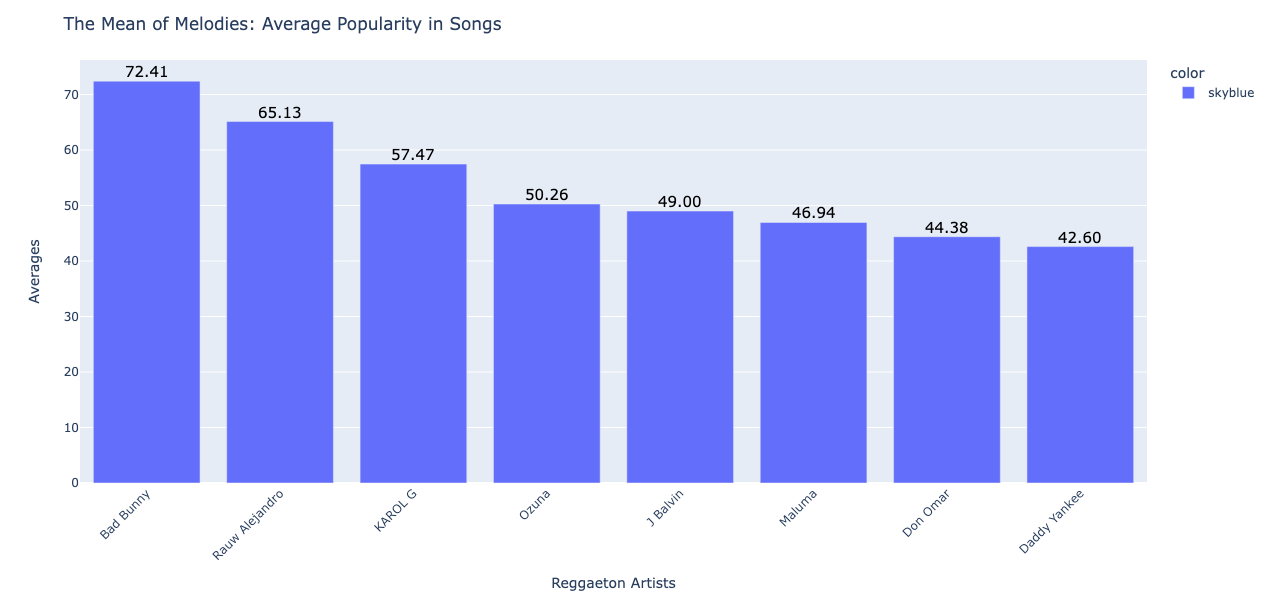

In [56]:
# Sort the average/mean values in descending order
sorted_mean_values_for_popularity = mean_values_of_features.sort_values('popularity',ascending=False)

print("Mean values of features sorted in descending order:")
print(sorted_mean_values_for_popularity['popularity'])


# Extracting the sorted mean values for 'popularity'
popularity_mean_sorted = sorted_mean_values_for_popularity['popularity']


# Define colors for the bars
colors = ['skyblue' if x != 'popularity' else 'salmon' for x in popularity_mean_sorted.index]

# Create a bar chart using the sorted mean values for 'popularity'
fig = px.bar(x=popularity_mean_sorted.index, y=popularity_mean_sorted, color=colors)

# Add labels and title
fig.update_layout(
    xaxis_title='Reggaeton Artists',
    yaxis_title='Averages',
    title='The Mean of Melodies: Average Popularity in Songs',
    xaxis_tickangle= -45,  # Rotate x-axis labels for better visibility
    height=600,  # Adjust the height of the chart
    width=1200    # Adjust the width of the chart
    
)

# Add labels for the percentage on top of each bar
for i, mean_value in enumerate(popularity_mean_sorted):
    fig.add_annotation(
        x=popularity_mean_sorted.index[i],
        y=mean_value,
        text=f'{mean_value:.2f}',
        font=dict(color='black', size=15), #change size of percentage
        showarrow=False,
        yshift=10 #change distance between bar and % number
    )

# Show plot
fig.show()

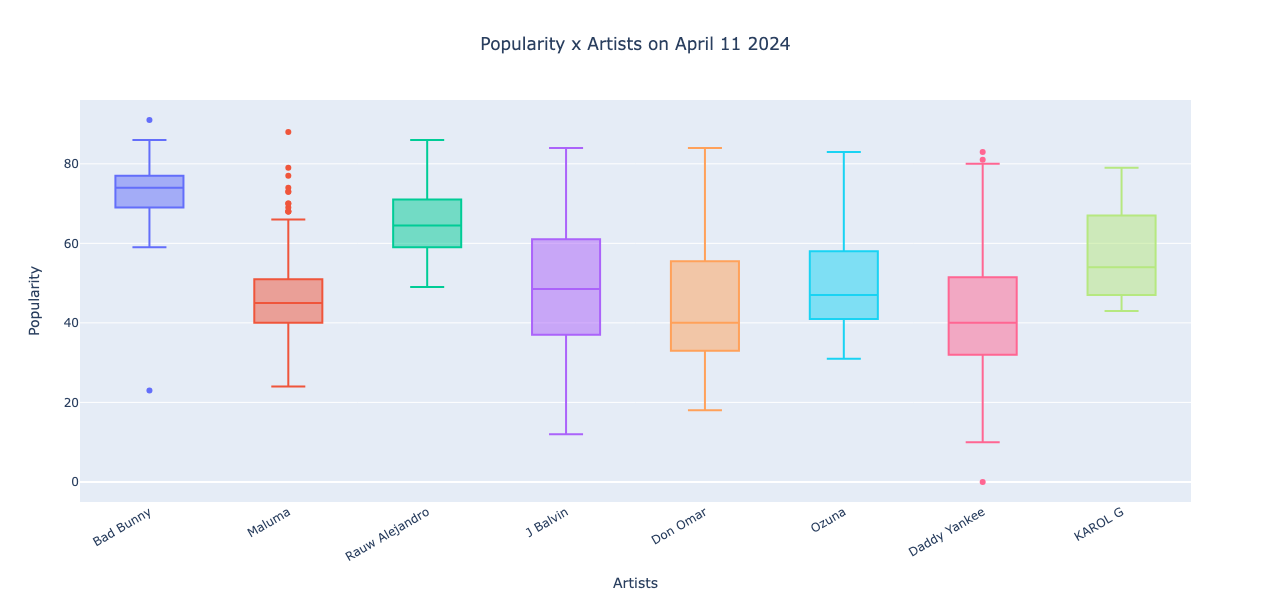

In [57]:
# Box plot
box_plot = px.box(df_unique, x='Artists', y='popularity', color='Artists',
                  title='Popularity x Artists on April 11 2024',
                  labels={'Artists': 'Artists', 'popularity': 'Popularity'}) # second is the label

# Update layout
box_plot.update_layout(
    showlegend=False, 
    height=600, 
    width=1200,  
    title_x=0.5  # Center title
)

# Rotate x-axis tick labels diagonally
box_plot.update_layout(
    xaxis=dict(
        tickangle=-30,
        tickmode='array',
        tickvals=list(range(len(df_unique['Artists'].unique()))),
        ticktext=list(df_unique['Artists'].unique())
    )
)

# Show the box plot
box_plot.show()

In [58]:
# Define the conditions for removing outliers for each artist
badbunny_condition = (df_unique['Artists'] == 'Bad Bunny') & (df_unique['popularity'] < 30)
daddy_condition = (df_unique['Artists'] == 'Daddy Yankee') & (df_unique['popularity'] < 10)

# Apply the conditions to filter the DataFrame
df_cleaned = df_unique[~(badbunny_condition | daddy_condition)]

# Optionally, reset index if needed
df_cleaned = df_cleaned.reset_index(drop=True)

In [59]:
df_cleaned.shape

(716, 26)

In [60]:
# Now without outliers in popularity, I am checking averages again on my numerical colums
mean_values_of_features2 = df_cleaned.groupby('Artists')[['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
                                                 'speechiness', 'acousticness', 'instrumentalness',
                                                 'liveness', 'valence', 'tempo', 'duration_minutes',
                                                 'time_signature', 'Release Day', 'Release Month',
                                                 'Release Year']].mean()
print(mean_values_of_features2)

                popularity  danceability    energy       key  loudness  \
Artists                                                                  
Bad Bunny        72.936170      0.747532  0.657670  4.840426 -5.823096   
Daddy Yankee     42.981982      0.765153  0.793829  5.270270 -5.370784   
Don Omar         44.375000      0.720913  0.748317  5.807692 -6.138240   
J Balvin         49.000000      0.732402  0.694779  5.511628 -5.790547   
KAROL G          57.466667      0.750956  0.713200  6.044444 -4.799378   
Maluma           46.944444      0.738000  0.717778  5.805556 -4.424148   
Ozuna            50.264151      0.752443  0.701868  5.066038 -5.013547   
Rauw Alejandro   65.129032      0.741677  0.726323  5.354839 -3.847129   

                    mode  speechiness  acousticness  instrumentalness  \
Artists                                                                 
Bad Bunny       0.500000     0.130676      0.250388          0.006884   
Daddy Yankee    0.522523     0.132769   

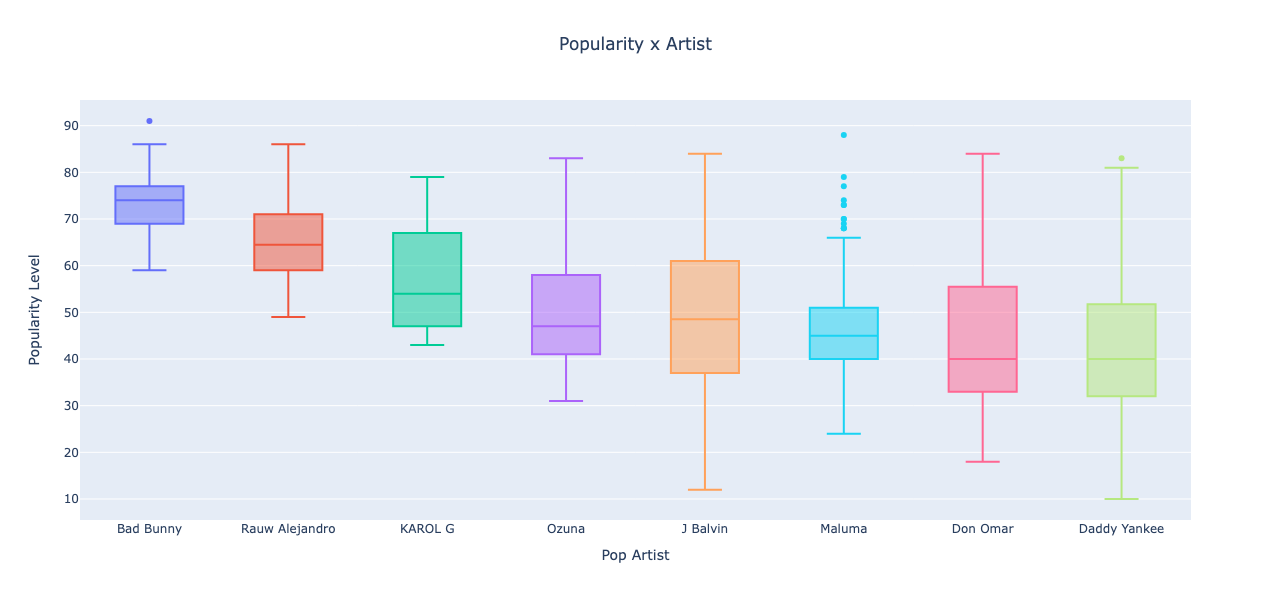

In [61]:
# Define the desired order of artists
# Define the desired order of artists
artist_order = ['Bad Bunny', 'Rauw Alejandro', 'KAROL G', 'Ozuna', 'J Balvin', 'Maluma', 'Don Omar', 'Daddy Yankee']
artist_order_popularity = ['Bad Bunny', 'Rauw Alejandro', 'KAROL G', 'Ozuna', 'J Balvin', 'Maluma', 'Don Omar', 'Daddy Yankee']

# Box plot
box_plot2 = px.box(df_cleaned, x='Artists', y='popularity', color='Artists',
                  title='Popularity x Artist',
                  labels={'Artists': 'Pop Artist', 'popularity': 'Popularity Level'},
                  category_orders={'Artists': artist_order_popularity})

# Update layout
box_plot2.update_layout(
    showlegend=False, 
    height=600, 
    width=1200,  
    title_x=0.5  # Center title
)

# Rotate x-axis tick labels diagonally
box_plot.update_layout(
    xaxis=dict(
        tickangle=-30,
        tickmode='array',
        tickvals=list(range(len(artist_order))),
        ticktext=artist_order
    )
)

# Show the box plot
box_plot2.show()

In [62]:
# Adding new column named, Genre
df_cleaned['Genre'] = 'Reggaeton'

In [63]:
# Export the DataFrame to a new CSV file
df_cleaned.to_csv('df_reggaeton_cleaned.csv', index=False)

- Correlation matrix

In [64]:
# Select numerical columns
numerical_df= df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

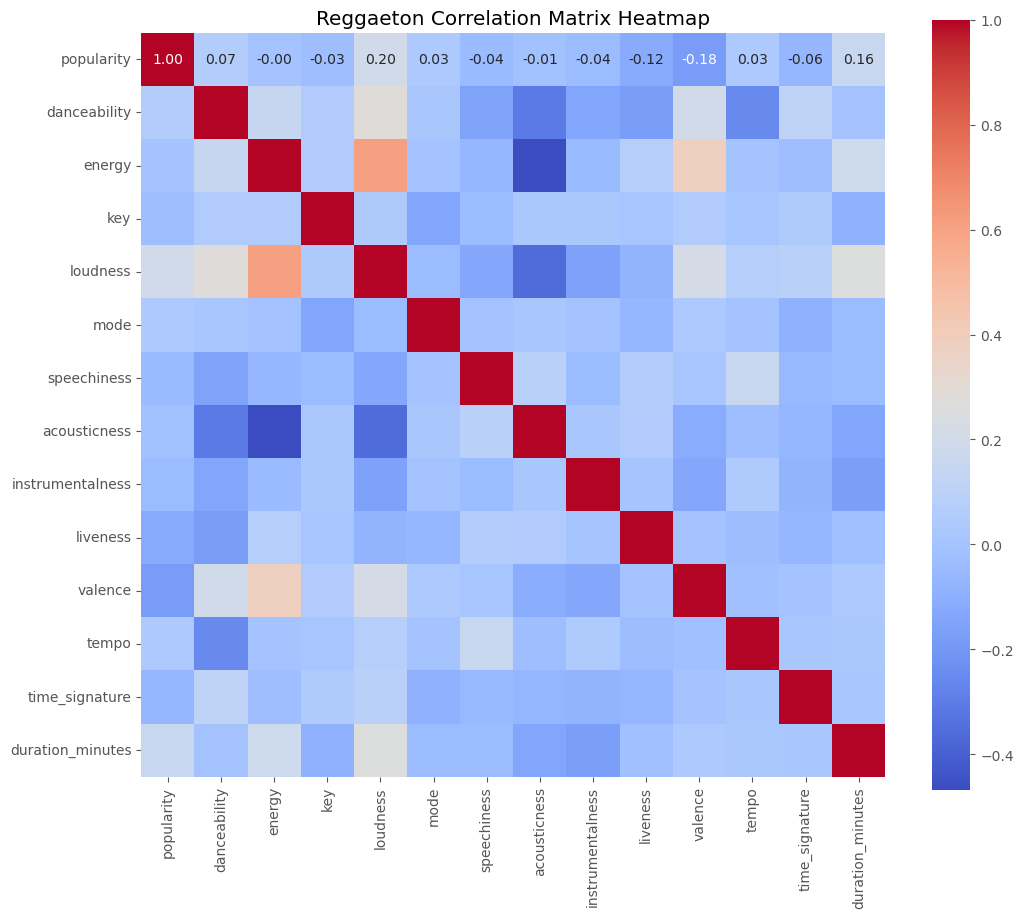

In [65]:
# Plot heatmap

# Create a new figure with a specified size (12 inches wide and 10 inches tall)
fig = plt.figure(figsize=(12, 10))

# Get the current Axes instance of the figure
ax = fig.gca()

# Plot the heatmap using seaborn's heatmap function
# correlation_matrix: the data to be plotted, assumed to be a correlation matrix
# annot=True: annotate each cell with the numeric value
# fmt=".2f": format for annotations, displaying two decimal places
# cmap='coolwarm': color map for the heatmap (cool to warm colors)
# ax=ax: plot the heatmap on the specified Axes instance
# annot_kws={"size": 10}: set the font size of the annotations to 10
# square=True: ensure the aspect ratio of the plot is square
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax, annot_kws={"size": 10}, square=True)

# Add a title to the plot
plt.title('Reggaeton Correlation Matrix Heatmap')

# Display the plot
plt.show()

In [66]:
# Create dummy variables for specified values in 'Artists'
key_name_dummies = pd.get_dummies(df_cleaned['Artists'], prefix='', prefix_sep='', columns=['Bad Bunny', 'Rauw Alejandro',
                                                                                            'KAROL G', 'Ozuna', 'J Balvin', 'Maluma',
                                                                                            'Don Omar', 'Daddy Yankee'], dtype='int')

In [67]:
# Concatenate the dummy variables with the original DataFrame
df_encoded = pd.concat([df_cleaned, key_name_dummies], axis=1)

In [68]:
df_encoded.shape

(716, 35)

In [69]:
df_encoded.head()

Name         Artists                                Album  \
0      PERRO NEGRO       Bad Bunny  nadie sabe lo que va a pasar mañana   
1      Según Quién          Maluma                             Don Juan   
2          DILUVIO  Rauw Alejandro                        PLAYA SATURNO   
3  Me Porto Bonito       Bad Bunny                     Un Verano Sin Ti   
4           MONACO       Bad Bunny  nadie sabe lo que va a pasar mañana   

  Release Date  popularity  danceability  energy  key  loudness  mode  ...  \
0   2023-10-13          91         0.911   0.778  5.0    -2.248   1.0  ...   
1   2023-08-25          88         0.909   0.762  9.0    -3.974   1.0  ...   
2   2023-07-07          86         0.845   0.795  9.0    -3.502   0.0  ...   
3   2022-05-06          86         0.911   0.712  1.0    -5.105   0.0  ...   
4   2023-10-13          86         0.787   0.621  4.0    -5.009   0.0  ...   

   duration_minutes      Genre  Bad Bunny  Daddy Yankee  Don Omar  J Balvin  \
0          2.712800  Reggaeton          1             0         0         0   
1          2.372250  Reggaeton          0             0         0         0   
2          3.284217  Reggaeton          0             0         0         0   
3          2.976117  Reggaeton          1             0         0         0   
4          4.453233  Reggaeton          1             0         0         0   

  KAROL G Maluma Ozuna Rauw Alejandro  
0       0      0     0              0  
1       0      1     0              0  
2       0      0     0              1  
3       0      0     0              0  
4       0      0     0              0  

[5 rows x 35 columns]

# Model

In [70]:
import sklearn as skl
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Feature matrix and target vector respectively
X = df_encoded.select_dtypes(['float', 'int'])
y = df_encoded['popularity']

X = X.drop(columns=['popularity'])

# popularity is gone 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      716 non-null    float64
 1   energy            716 non-null    float64
 2   key               716 non-null    float64
 3   loudness          716 non-null    float64
 4   mode              716 non-null    float64
 5   speechiness       716 non-null    float64
 6   acousticness      716 non-null    float64
 7   instrumentalness  716 non-null    float64
 8   liveness          716 non-null    float64
 9   valence           716 non-null    float64
 10  tempo             716 non-null    float64
 11  time_signature    716 non-null    float64
 12  Release Day       716 non-null    int32  
 13  Release Month     716 non-null    int32  
 14  Release Year      716 non-null    int32  
 15  duration_minutes  716 non-null    float64
 16  Bad Bunny         716 non-null    int64  
 1

In [71]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a list of alpha values to try for Lasso and Ridge regression
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Store results
results = []

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_pred = linear_reg.predict(X_test_scaled)
linear_r2 = r2_score(y_test, linear_pred)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_mape = np.mean(np.abs((y_test - linear_pred) / y_test)) * 100

results.append({
    'Model': 'Linear Regression',
    'R2 Score': linear_r2,
    'MSE': linear_mse,
    'MAPE': linear_mape
})

# Lasso Regression
for alpha in alpha_values:
    lasso = Lasso(alpha=0.1, max_iter=1000, random_state=42) 
    lasso.fit(X_train_scaled, y_train)
    lasso_pred = lasso.predict(X_test_scaled)
    lasso_r2 = r2_score(y_test, lasso_pred)
    lasso_mse = mean_squared_error(y_test, lasso_pred)
    lasso_mape = np.mean(np.abs((y_test - lasso_pred) / y_test)) * 100

    results.append({
        'Model': f'Lasso (alpha={alpha})',
        'R2 Score': lasso_r2,
        'MSE': lasso_mse,
        'MAPE': lasso_mape
    })

# Ridge Regression
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_pred = ridge.predict(X_test_scaled)
    ridge_r2 = r2_score(y_test, ridge_pred)
    ridge_mse = mean_squared_error(y_test, ridge_pred)
    ridge_mape = np.mean(np.abs((y_test - ridge_pred) / y_test)) * 100
    
    results.append({
        'Model': f'Ridge (alpha={alpha})',
        'R2 Score': ridge_r2,
        'MSE': ridge_mse,
        'MAPE': ridge_mape
    })


In [72]:
# Convert results to DataFrame for easier visualization
results_reggaeton_df_one = pd.DataFrame(results)

# Print results
print(results_reggaeton_df_one)

                  Model  R2 Score         MSE       MAPE
0     Linear Regression  0.478357  150.091329  21.238273
1   Lasso (alpha=0.001)  0.485390  148.067600  21.128502
2    Lasso (alpha=0.01)  0.485390  148.067600  21.128502
3     Lasso (alpha=0.1)  0.485390  148.067600  21.128502
4       Lasso (alpha=1)  0.485390  148.067600  21.128502
5      Lasso (alpha=10)  0.485390  148.067600  21.128502
6     Lasso (alpha=100)  0.485390  148.067600  21.128502
7   Ridge (alpha=0.001)  0.477864  150.233210  21.259835
8    Ridge (alpha=0.01)  0.477865  150.232706  21.259816
9     Ridge (alpha=0.1)  0.477883  150.227675  21.259622
10      Ridge (alpha=1)  0.478055  150.178225  21.257709
11     Ridge (alpha=10)  0.479495  149.763938  21.242444
12    Ridge (alpha=100)  0.477845  150.238645  21.735470


# Lasso Regression

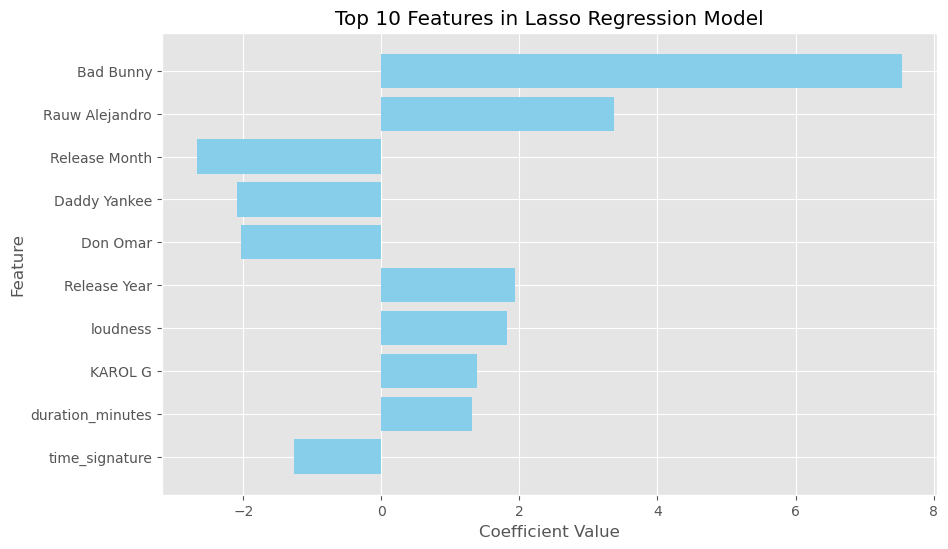

Test Score: 0.4853902975288159
MSE Score: 148.06760042032178


In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with StandardScaler and Lasso regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'lasso__alpha': [0.01, 0.1, 1, 10, 100]  # Example alpha values to search over
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Evaluate test score
test_score = best_model.score(X_test, y_test)

# Get coefficients and corresponding feature names from best model
coefficients = best_model.named_steps['lasso'].coef_
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 10 coefficients
top_10_coefficients = coefficients_df.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_coefficients['Feature'], top_10_coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features in Lasso Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients on top
plt.show()

print("Test Score:", test_score)
y_pred = best_model.predict(X_test)

# Calculate MSE score
mse = mean_squared_error(y_test, y_pred)

# Print scores
print("MSE Score:", mse)

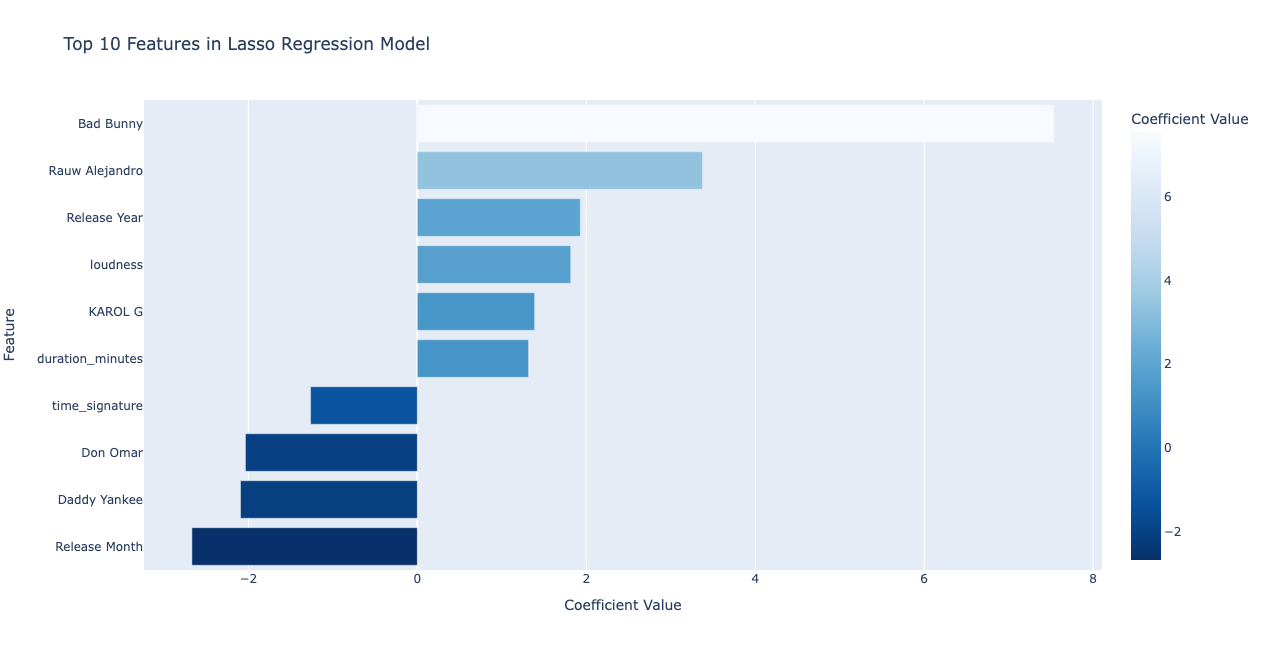

Test Score: 0.4853902975288159
MSE Score: 148.06760042032178


In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with StandardScaler and Lasso regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'lasso__alpha': [0.01, 0.1, 1, 10, 100]  # Example alpha values to search over
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Evaluate test score
test_score = best_model.score(X_test, y_test)

# Get coefficients and corresponding feature names from best model
coefficients = best_model.named_steps['lasso'].coef_
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 10 coefficients
top_10_coefficients = coefficients_df.head(10)

# Plotting using Plotly Express
import plotly.express as px

fig = px.bar(top_10_coefficients, 
             x='Coefficient', 
             y='Feature', 
             orientation='h', 
             title='Top 10 Features in Lasso Regression Model',
             labels={'Coefficient': 'Coefficient Value', 'Feature': 'Feature'},
             color='Coefficient',
             color_continuous_scale='Blues_r')

fig.update_yaxes(categoryorder='total ascending')  # Ensure features are ordered by coefficient value
fig.update_layout(height=650, width=1000)  # Adjust the size of the chart

fig.show()

# Print test score
print("Test Score:", test_score)

# Predict using the best model
y_pred = best_model.predict(X_test)

# Calculate MSE score
mse = mean_squared_error(y_test, y_pred)

# Print scores
print("MSE Score:", mse)


# Ridge regression

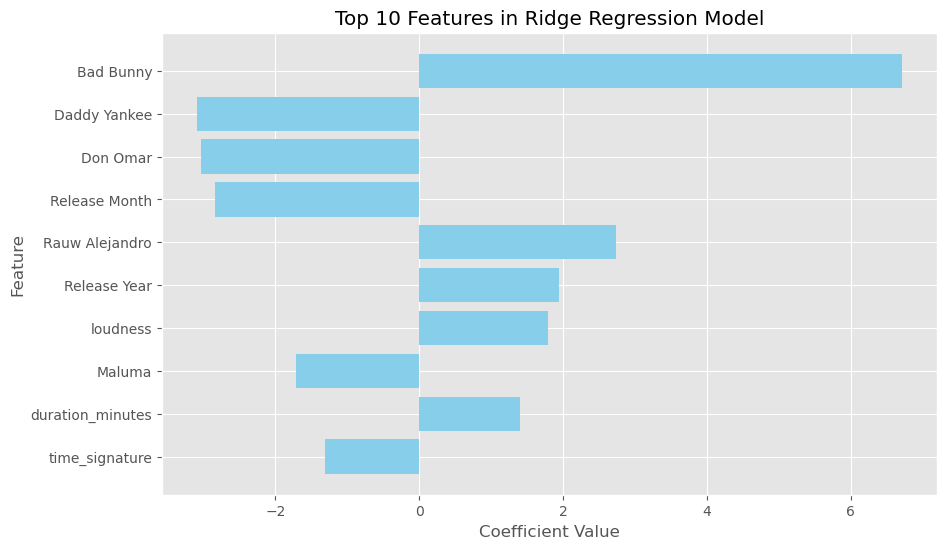

Test Score: 0.47949466894699766
MSE Score: 149.76393761118183


In [75]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with StandardScaler and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]  # Example alpha values to search over
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Evaluate test score
test_score = best_model.score(X_test, y_test)

# Get coefficients and corresponding feature names from best model
coefficients = best_model.named_steps['ridge'].coef_
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 10 coefficients
top_10_coefficients = coefficients_df.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_coefficients['Feature'], top_10_coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features in Ridge Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients on top
plt.show()

print("Test Score:", test_score)
y_pred = best_model.predict(X_test)

# Calculate MSE score
mse = mean_squared_error(y_test, y_pred)

# Print scores
print("MSE Score:", mse)

# Random Forest Regressor

In [76]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor 

In [77]:
estimators = [('normalise', StandardScaler()),
              ('reduce_dim', PCA(n_components=16)),
              ('model', RandomForestRegressor())]

pipe = Pipeline(estimators)


param_grid = [{'model__max_depth': [4, 8, 10], # Options Yes or NO. setting a limit on how deep
               'model__min_samples_leaf':[4, 8, 12], # This is size of leaf, small the leaf we can have Overfitting. Note: There's no Regularizarion on Decision Tree.
               'model__min_samples_split':[4,6, 8]} # This is also related to the size of leaf.
]

grid = GridSearchCV(pipe, param_grid, cv=2,verbose=6, n_jobs=2)

fittedgrid = grid.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV 2/2] END model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4;, score=0.281 total time=   0.1s
[CV 1/2] END model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4;, score=0.256 total time=   0.1s
[CV 1/2] END model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6;, score=0.268 total time=   0.1s
[CV 2/2] END model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6;, score=0.267 total time=   0.1s
[CV 1/2] END model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8;, score=0.276 total time=   0.1s
[CV 2/2] END model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8;, score=0.297 total time=   0.1s
[CV 1/2] END model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=4;, score=0.261 total time=   0.1s
[CV 2/2] END model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=4;, score=0.26

In [78]:
# Best estimator object
fittedgrid.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('reduce_dim', PCA(n_components=16)),
                ('model',
                 RandomForestRegressor(max_depth=4, min_samples_leaf=4,
                                       min_samples_split=8))])

In [79]:
# Best estimator object
fittedgrid.best_estimator_.steps[2][1].feature_importances_

array([0.1091378 , 0.11308071, 0.21506693, 0.02015399, 0.12178159,
       0.13778549, 0.08461256, 0.03873013, 0.02848035, 0.02084069,
       0.02997663, 0.01478932, 0.01929502, 0.01760123, 0.0203931 ,
       0.00827446])

- 0.16082987
- Key feature

In [80]:
# Best hyperparameters
fittedgrid.best_params_

{'model__max_depth': 4,
 'model__min_samples_leaf': 4,
 'model__min_samples_split': 8}

In [81]:
# Scoring from my pipeline using GridsearchCV
# Getting the best score from my pipeline using GridSearchCV
fittedgrid.score(X_test_scaled, y_test)

0.3972244583671396